In [1]:
import numpy as np
import pandas as pd

In [2]:
header = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('ml-latest-small/ratings.csv', sep=',', header=0, names=header)

In [3]:
n_users = df.user_id.unique().shape[0]
n_items = df.item_id.unique().shape[0]
print('Number of users = ' + str(n_users) + ' | Number of movies = ' + str(n_items))

Number of users = 671 | Number of movies = 9066


In [4]:
df[:10]

,user_id,item_id,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [7]:
from scipy import sparse

In [8]:
r = df['rating']
u = df['user_id']
i = df['item_id']

M_ui = sparse.csr_matrix(
    (r, (u, i)),
    dtype=np.float,
)

In [9]:
from matplotlib import pyplot as plt

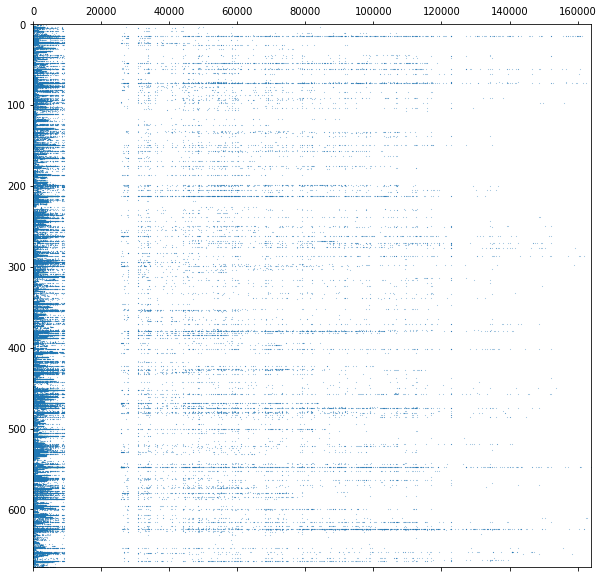

In [10]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.spy(M_ui, aspect='auto', markersize=.1)
plt.show()

In [11]:
from sklearn import model_selection
train_data, test_data = model_selection.train_test_split(df, test_size=0.25)

In [12]:
data = train_data

r = data['rating'].astype(float)
u = data['user_id'].astype(int)
i = data['item_id'].astype(int)

train_data_matrix = scipy.sparse.csr_matrix(
    (r, (u, i)),
    dtype=np.float,
)

In [13]:
from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(train_data_matrix, metric='cosine')

In [27]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        #You use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating)
        pred = (
            mean_user_rating
            + (
                similarity.dot(ratings_diff)
                / (np.array([np.abs(similarity).sum(axis=1)]).T)
              )
        )
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [15]:
data = test_data

r = data['rating'].astype(float)
u = data['user_id'].astype(int)
i = data['item_id'].astype(int)

test_data_matrix = scipy.sparse.csr_matrix(
    (r, (u, i)),
    dtype=np.float,
)

In [25]:
test_data_matrix.shape

(672, 162673)

In [30]:
user_prediction = predict(
    train_data_matrix, 
    pairwise_distances(train_data_matrix, metric='cosine')
)

In [34]:
user_prediction.shape

(672, 163950)

In [76]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()]
    ground_truth = ground_truth[ground_truth.nonzero()]
    
    return sqrt(mean_squared_error(prediction, ground_truth))

In [77]:
user_rmse = rmse(user_prediction, test_data_matrix)

print('User-based CF RMSE: ' + str(user_rmse))

User-based CF RMSE: 3.452419538030095


In [91]:
random_baseline = np.random.rand(*test_data_matrix.shape) * 5

In [92]:
mean_squared_error(
    random_baseline[test_data_matrix.nonzero()][np.newaxis,:],
    test_data_matrix[test_data_matrix.nonzero()],
)

4.329021926648201